In [2]:
import numpy as np

# single_machine_small_input : ./single_machine_test.sh 200 100
with open("single_machine_small_input", "r") as f:
    lines = f.readlines()
    f.close()

In [3]:
# In order : name load_time method blur sobel (blur+sobel) export
print(lines[25])
print(lines[26])

images/test/1000.gif 0.006646 MPI-6_Cuda 1.091023 0.004104 1.099064 0.014201 

images/test/1100.gif 0.020706 classic 0.005167 0.005847 0.011104 0.019287 



In [4]:
line = lines[0]
terms = line.split(" ")
file = terms[0].split("/")[-1]
file = int(file.split(".")[0])
load_time = float(terms[1])
method = terms[2]
blur_time = float(terms[3])
sobel_time = float(terms[4])
filter_time = float(terms[5])
export_time = float(terms[6])

In [5]:
print(file, load_time, method, blur_time, sobel_time, filter_time, export_time)

1000 0.006669 classic 0.00301 0.004422 0.007444 0.013989


In [6]:
total_test_per_file = 26
n = len(lines) // total_test_per_file
max_processes_mpi = 6
max_threads_openmp = 6
height_min = 200
step = 100

classic = np.zeros((n, 5))
openmp = np.zeros((n, max_threads_openmp, 5))
cuda = np.zeros((n, 5))
mpi = np.zeros((n, max_processes_mpi, 5))
mpi_omp = np.zeros((n, max_processes_mpi, 5))
mpi_cuda = np.zeros((n, max_processes_mpi, 5))

for line in lines:
    terms = line.split(" ")
    file = terms[0].split("/")[-1]
    file = int(file.split(".")[0])
    load_time = float(terms[1])
    method = terms[2]
    blur_time = float(terms[3])
    sobel_time = float(terms[4])
    filter_time = float(terms[5])
    export_time = float(terms[6])
    index = (file - height_min) // step
    times = np.array([load_time, blur_time, sobel_time, filter_time, export_time])
    if "MPI" in method and "OpenMP" in method:
        i = int(method[4]) - 1
        mpi_omp[index][i] = times
    elif "MPI" in method and "Cuda" in method:
        i = int(method[4]) - 1
        mpi_cuda[index][i] = times
    elif "MPI" in method:
        i = int(method[4]) - 1
        mpi[index][i] = times
    elif method == "CUDA":
        cuda[index] = times
    elif "OpenMP" in method:
        i = int(method[-1]) - 1
        openmp[index][i] = times
    elif method == "classic":
        classic[index] = times

In [7]:
import matplotlib.pyplot as plt

## Different time

Text(0.5, 0, 'height')

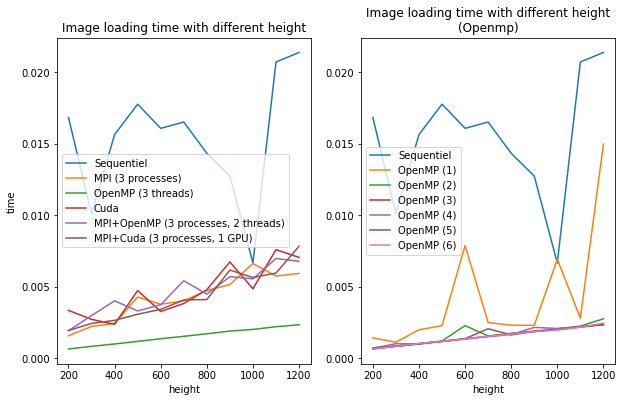

In [8]:
# Loading time
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
x = list(range(height_min, height_min+10*step+1, step))
i = 0
# Between methods
axes_x = 0
ax[axes_x].plot(x, classic[:, i], label="Sequentiel")
ax[axes_x].plot(x, mpi[:, 2, i], label="MPI (3 processes)")
ax[axes_x].plot(x, openmp[:, 2, i], label="OpenMP (3 threads)")
ax[axes_x].plot(x, cuda[:, i], label="Cuda")
ax[axes_x].plot(x, mpi_omp[:, 2, i], label="MPI+OpenMP (3 processes, 2 threads)")
ax[axes_x].plot(x, mpi_cuda[:, 2, i], label="MPI+Cuda (3 processes, 1 GPU)")
ax[axes_x].legend(loc="best")
ax[axes_x].set_title("Image loading time with different height")
ax[axes_x].set_ylabel("time")
ax[axes_x].set_xlabel("height")
# Openmp
axes_x = 1
ax[axes_x].plot(x, classic[:, i], label="Sequentiel")
for j in range(6):
    ax[axes_x].plot(x, openmp[:, j, i], label="OpenMP ({})".format(j+1))
ax[axes_x].legend(loc="best")
ax[axes_x].set_title("Image loading time with different height\n(Openmp)")
ax[axes_x].set_xlabel("height")

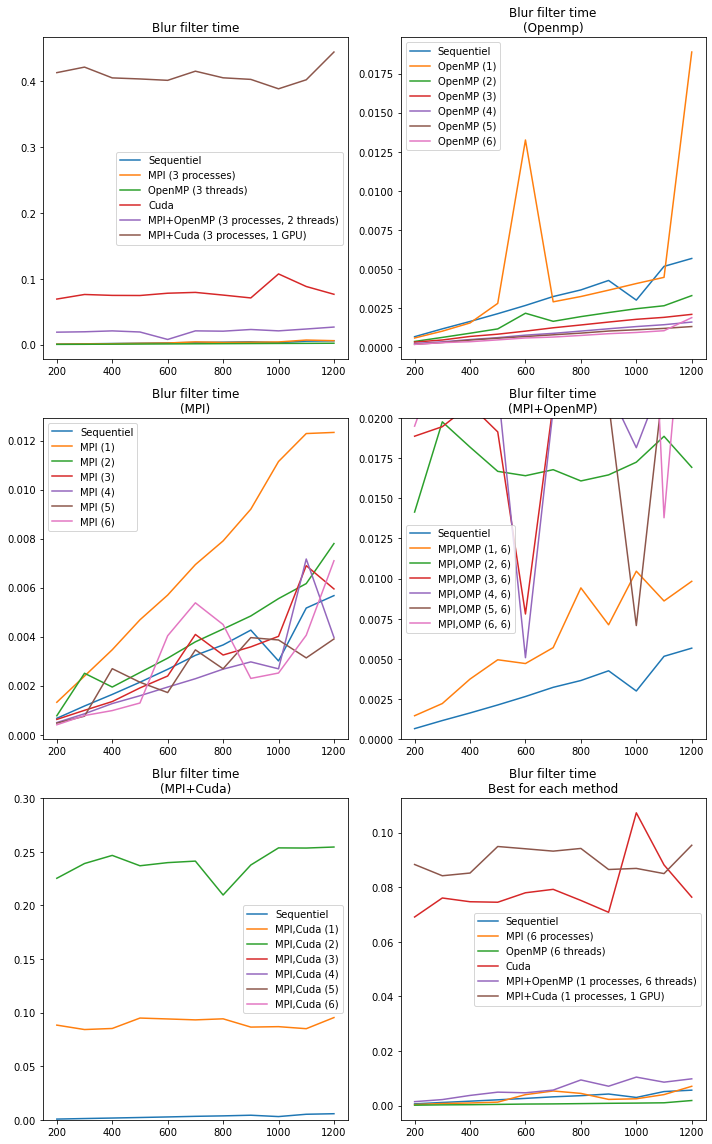

In [9]:
# Blur time
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 16))
i = 1
name="Blur filter time"
# Between methods
axes_x = 0
axes_y = 0
ax[axes_x][axes_y].plot(x, classic[:, i], label="Sequentiel")
ax[axes_x][axes_y].plot(x, mpi[:, 2, i], label="MPI (3 processes)")
ax[axes_x][axes_y].plot(x, openmp[:, 2, i], label="OpenMP (3 threads)")
ax[axes_x][axes_y].plot(x, cuda[:, i], label="Cuda")
ax[axes_x][axes_y].plot(x, mpi_omp[:, 2, i], label="MPI+OpenMP (3 processes, 2 threads)")
ax[axes_x][axes_y].plot(x, mpi_cuda[:, 2, i], label="MPI+Cuda (3 processes, 1 GPU)")
ax[axes_x][axes_y].legend(loc="best")
ax[axes_x][axes_y].set_title(name)
# Openmp
axes_x = 0
axes_y = 1
ax[axes_x][axes_y].plot(x, classic[:, i], label="Sequentiel")
for j in range(6):
    ax[axes_x][axes_y].plot(x, openmp[:, j, i], label="OpenMP ({})".format(j+1))
ax[axes_x][axes_y].legend(loc="best")
ax[axes_x][axes_y].set_title(name+"\n(Openmp)")
# Mpi
axes_x = 1
axes_y = 0
ax[axes_x][axes_y].plot(x, classic[:, i], label="Sequentiel")
for j in range(6):
    ax[axes_x][axes_y].plot(x, mpi[:, j, i], label="MPI ({})".format(j+1))
ax[axes_x][axes_y].legend(loc="best")
ax[axes_x][axes_y].set_title(name+"\n(MPI)")
plt.tight_layout()
# Mpi+openmp
axes_x = 1
axes_y = 1
ax[axes_x][axes_y].plot(x, classic[:, i], label="Sequentiel")
for j in range(6):
    ax[axes_x][axes_y].plot(x, mpi_omp[:, j, i], label="MPI,OMP ({}, 6)".format(j+1))
ax[axes_x][axes_y].legend(loc="best")
ax[axes_x][axes_y].set_title(name+"\n(MPI+OpenMP)")
ax[axes_x][axes_y].set_ylim(0, 0.02)
plt.tight_layout()

# Mpi+cuda
axes_x = 2
axes_y = 0
ax[axes_x][axes_y].plot(x, classic[:, i], label="Sequentiel")
for j in range(6):
    ax[axes_x][axes_y].plot(x, mpi_cuda[:, j, i], label="MPI,Cuda ({})".format(j+1))
ax[axes_x][axes_y].legend(loc="best")
ax[axes_x][axes_y].set_title(name+"\n(MPI+Cuda)")
ax[axes_x][axes_y].set_ylim(0, 0.3)
plt.tight_layout()

# best
axes_x = 2
axes_y = 1
ax[axes_x][axes_y].plot(x, classic[:, i], label="Sequentiel")
ax[axes_x][axes_y].plot(x, mpi[:, 5, i], label="MPI (6 processes)")
ax[axes_x][axes_y].plot(x, openmp[:, 5, i], label="OpenMP (6 threads)")
ax[axes_x][axes_y].plot(x, cuda[:, i], label="Cuda")
ax[axes_x][axes_y].plot(x, mpi_omp[:, 0, i], label="MPI+OpenMP (1 processes, 6 threads)")
ax[axes_x][axes_y].plot(x, mpi_cuda[:, 0, i], label="MPI+Cuda (1 processes, 1 GPU)")
ax[axes_x][axes_y].legend(loc="best")
ax[axes_x][axes_y].set_title(name)
ax[axes_x][axes_y].set_title(name+"\nBest for each method")
#ax[axes_x][axes_y].set_ylim(0, 0.3)
plt.tight_layout()

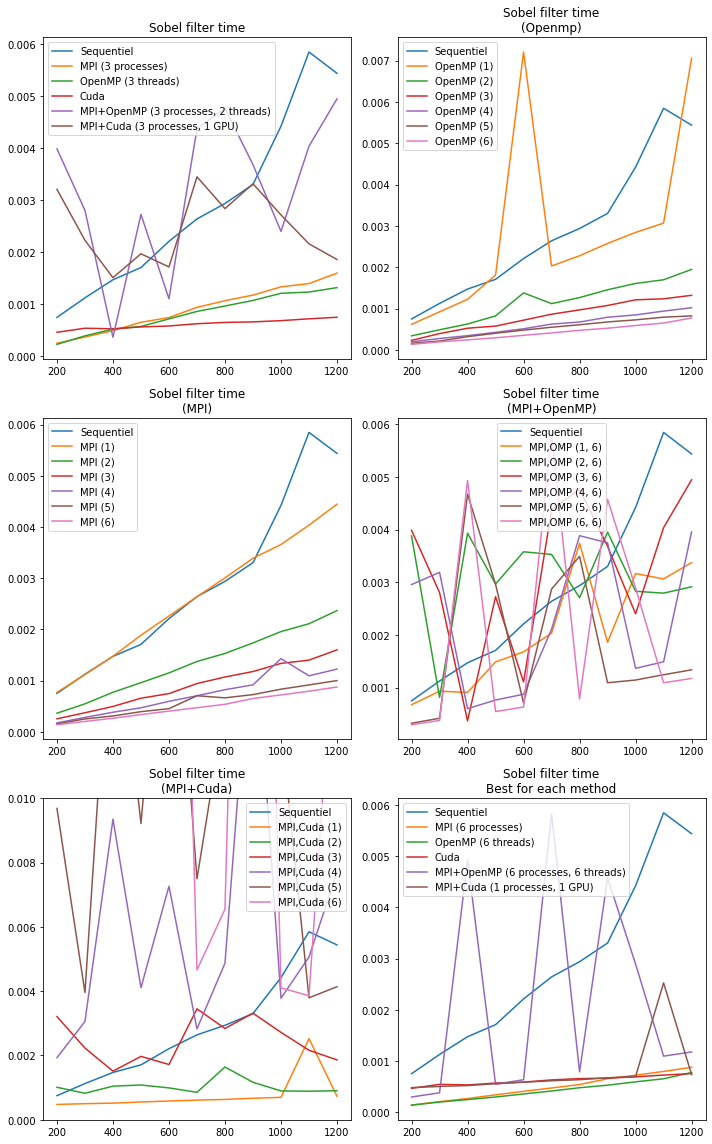

In [10]:
# Sobel time
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 16))
i = 2
name="Sobel filter time"
# Between methods
axes_x = 0
axes_y = 0
ax[axes_x][axes_y].plot(x, classic[:, i], label="Sequentiel")
ax[axes_x][axes_y].plot(x, mpi[:, 2, i], label="MPI (3 processes)")
ax[axes_x][axes_y].plot(x, openmp[:, 2, i], label="OpenMP (3 threads)")
ax[axes_x][axes_y].plot(x, cuda[:, i], label="Cuda")
ax[axes_x][axes_y].plot(x, mpi_omp[:, 2, i], label="MPI+OpenMP (3 processes, 2 threads)")
ax[axes_x][axes_y].plot(x, mpi_cuda[:, 2, i], label="MPI+Cuda (3 processes, 1 GPU)")
ax[axes_x][axes_y].legend(loc="best")
ax[axes_x][axes_y].set_title(name)
# Openmp
axes_x = 0
axes_y = 1
ax[axes_x][axes_y].plot(x, classic[:, i], label="Sequentiel")
for j in range(6):
    ax[axes_x][axes_y].plot(x, openmp[:, j, i], label="OpenMP ({})".format(j+1))
ax[axes_x][axes_y].legend(loc="best")
ax[axes_x][axes_y].set_title(name+"\n(Openmp)")
# Mpi
axes_x = 1
axes_y = 0
ax[axes_x][axes_y].plot(x, classic[:, i], label="Sequentiel")
for j in range(6):
    ax[axes_x][axes_y].plot(x, mpi[:, j, i], label="MPI ({})".format(j+1))
ax[axes_x][axes_y].legend(loc="best")
ax[axes_x][axes_y].set_title(name+"\n(MPI)")
plt.tight_layout()
# Mpi+openmp
axes_x = 1
axes_y = 1
ax[axes_x][axes_y].plot(x, classic[:, i], label="Sequentiel")
for j in range(6):
    ax[axes_x][axes_y].plot(x, mpi_omp[:, j, i], label="MPI,OMP ({}, 6)".format(j+1))
ax[axes_x][axes_y].legend(loc="best")
ax[axes_x][axes_y].set_title(name+"\n(MPI+OpenMP)")
#ax[axes_x][axes_y].set_ylim(0, 0.02)
plt.tight_layout()

# Mpi+cuda
axes_x = 2
axes_y = 0
ax[axes_x][axes_y].plot(x, classic[:, i], label="Sequentiel")
for j in range(6):
    ax[axes_x][axes_y].plot(x, mpi_cuda[:, j, i], label="MPI,Cuda ({})".format(j+1))
ax[axes_x][axes_y].legend(loc="best")
ax[axes_x][axes_y].set_title(name+"\n(MPI+Cuda)")
ax[axes_x][axes_y].set_ylim(0, 0.01)

# best
axes_x = 2
axes_y = 1
ax[axes_x][axes_y].plot(x, classic[:, i], label="Sequentiel")
ax[axes_x][axes_y].plot(x, mpi[:, 5, i], label="MPI (6 processes)")
ax[axes_x][axes_y].plot(x, openmp[:, 5, i], label="OpenMP (6 threads)")
ax[axes_x][axes_y].plot(x, cuda[:, i], label="Cuda")
ax[axes_x][axes_y].plot(x, mpi_omp[:, 5, i], label="MPI+OpenMP (6 processes, 6 threads)")
ax[axes_x][axes_y].plot(x, mpi_cuda[:, 0, i], label="MPI+Cuda (1 processes, 1 GPU)")
ax[axes_x][axes_y].legend(loc="best")
ax[axes_x][axes_y].set_title(name)
ax[axes_x][axes_y].set_title(name+"\nBest for each method")
#ax[axes_x][axes_y].set_ylim(0, 0.3)
plt.tight_layout()

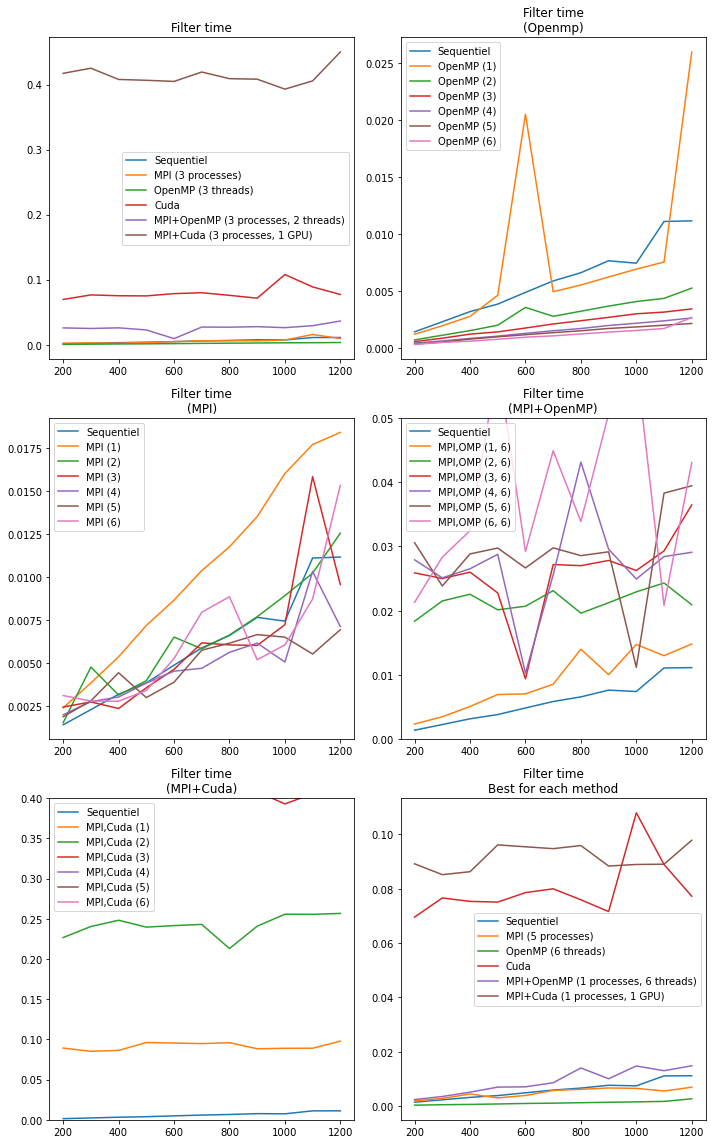

In [11]:
# Blur+Sobel time
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 16))
i = 3
name="Filter time"
# Between methods
axes_x = 0
axes_y = 0
ax[axes_x][axes_y].plot(x, classic[:, i], label="Sequentiel")
ax[axes_x][axes_y].plot(x, mpi[:, 2, i], label="MPI (3 processes)")
ax[axes_x][axes_y].plot(x, openmp[:, 2, i], label="OpenMP (3 threads)")
ax[axes_x][axes_y].plot(x, cuda[:, i], label="Cuda")
ax[axes_x][axes_y].plot(x, mpi_omp[:, 2, i], label="MPI+OpenMP (3 processes, 2 threads)")
ax[axes_x][axes_y].plot(x, mpi_cuda[:, 2, i], label="MPI+Cuda (3 processes, 1 GPU)")
ax[axes_x][axes_y].legend(loc="best")
ax[axes_x][axes_y].set_title(name)
# Openmp
axes_x = 0
axes_y = 1
ax[axes_x][axes_y].plot(x, classic[:, i], label="Sequentiel")
for j in range(6):
    ax[axes_x][axes_y].plot(x, openmp[:, j, i], label="OpenMP ({})".format(j+1))
ax[axes_x][axes_y].legend(loc="best")
ax[axes_x][axes_y].set_title(name+"\n(Openmp)")
# Mpi
axes_x = 1
axes_y = 0
ax[axes_x][axes_y].plot(x, classic[:, i], label="Sequentiel")
for j in range(6):
    ax[axes_x][axes_y].plot(x, mpi[:, j, i], label="MPI ({})".format(j+1))
ax[axes_x][axes_y].legend(loc="best")
ax[axes_x][axes_y].set_title(name+"\n(MPI)")
plt.tight_layout()
# Mpi+openmp
axes_x = 1
axes_y = 1
ax[axes_x][axes_y].plot(x, classic[:, i], label="Sequentiel")
for j in range(6):
    ax[axes_x][axes_y].plot(x, mpi_omp[:, j, i], label="MPI,OMP ({}, 6)".format(j+1))
ax[axes_x][axes_y].legend(loc="best")
ax[axes_x][axes_y].set_title(name+"\n(MPI+OpenMP)")
ax[axes_x][axes_y].set_ylim(0, 0.05)
plt.tight_layout()

# Mpi+cuda
axes_x = 2
axes_y = 0
ax[axes_x][axes_y].plot(x, classic[:, i], label="Sequentiel")
for j in range(6):
    ax[axes_x][axes_y].plot(x, mpi_cuda[:, j, i], label="MPI,Cuda ({})".format(j+1))
ax[axes_x][axes_y].legend(loc="best")
ax[axes_x][axes_y].set_title(name+"\n(MPI+Cuda)")
ax[axes_x][axes_y].set_ylim(0, 0.4)

# best
axes_x = 2
axes_y = 1
ax[axes_x][axes_y].plot(x, classic[:, i], label="Sequentiel")
ax[axes_x][axes_y].plot(x, mpi[:, 4, i], label="MPI (5 processes)")
ax[axes_x][axes_y].plot(x, openmp[:, 5, i], label="OpenMP (6 threads)")
ax[axes_x][axes_y].plot(x, cuda[:, i], label="Cuda")
ax[axes_x][axes_y].plot(x, mpi_omp[:, 0, i], label="MPI+OpenMP (1 processes, 6 threads)")
ax[axes_x][axes_y].plot(x, mpi_cuda[:, 0, i], label="MPI+Cuda (1 processes, 1 GPU)")
ax[axes_x][axes_y].legend(loc="best")
ax[axes_x][axes_y].set_title(name)
ax[axes_x][axes_y].set_title(name+"\nBest for each method")
#ax[axes_x][axes_y].set_ylim(0, 0.3)

plt.tight_layout()

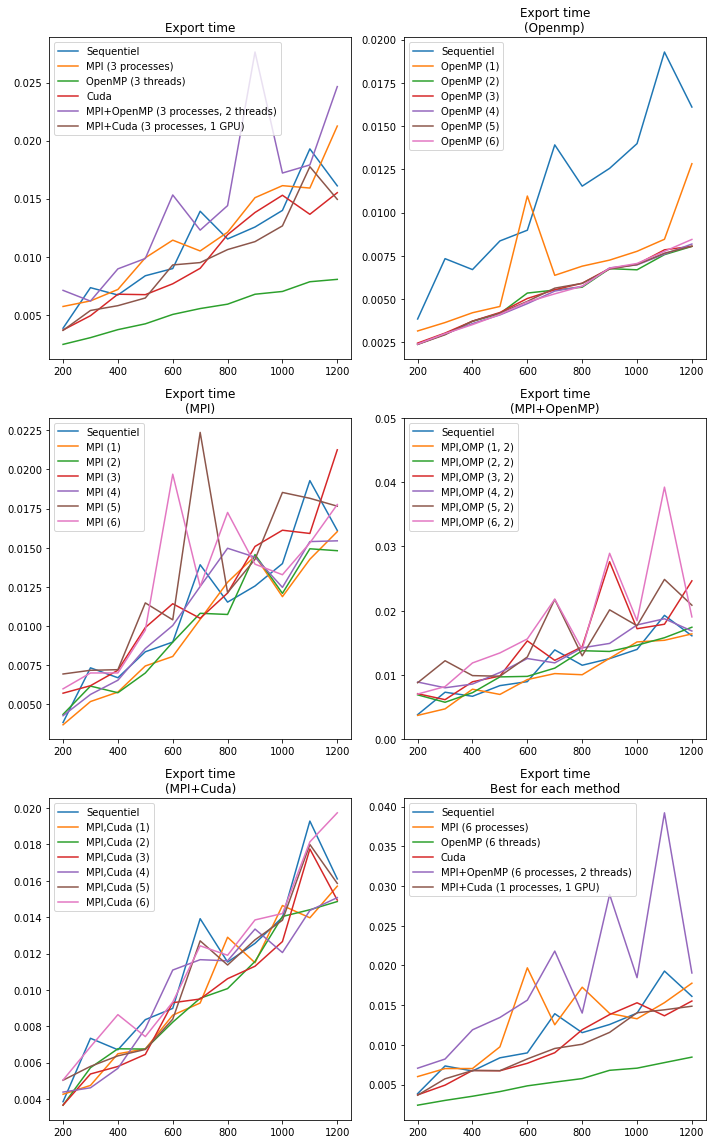

In [12]:
# Export time
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 16))
i = 4
name="Export time"
# Between methods
axes_x = 0
axes_y = 0
ax[axes_x][axes_y].plot(x, classic[:, i], label="Sequentiel")
ax[axes_x][axes_y].plot(x, mpi[:, 2, i], label="MPI (3 processes)")
ax[axes_x][axes_y].plot(x, openmp[:, 2, i], label="OpenMP (3 threads)")
ax[axes_x][axes_y].plot(x, cuda[:, i], label="Cuda")
ax[axes_x][axes_y].plot(x, mpi_omp[:, 2, i], label="MPI+OpenMP (3 processes, 2 threads)")
ax[axes_x][axes_y].plot(x, mpi_cuda[:, 2, i], label="MPI+Cuda (3 processes, 1 GPU)")
ax[axes_x][axes_y].legend(loc="best")
ax[axes_x][axes_y].set_title(name)
# Openmp
axes_x = 0
axes_y = 1
ax[axes_x][axes_y].plot(x, classic[:, i], label="Sequentiel")
for j in range(6):
    ax[axes_x][axes_y].plot(x, openmp[:, j, i], label="OpenMP ({})".format(j+1))
ax[axes_x][axes_y].legend(loc="best")
ax[axes_x][axes_y].set_title(name+"\n(Openmp)")
# Mpi
axes_x = 1
axes_y = 0
ax[axes_x][axes_y].plot(x, classic[:, i], label="Sequentiel")
for j in range(6):
    ax[axes_x][axes_y].plot(x, mpi[:, j, i], label="MPI ({})".format(j+1))
ax[axes_x][axes_y].legend(loc="best")
ax[axes_x][axes_y].set_title(name+"\n(MPI)")
plt.tight_layout()
# Mpi+openmp
axes_x = 1
axes_y = 1
ax[axes_x][axes_y].plot(x, classic[:, i], label="Sequentiel")
for j in range(6):
    ax[axes_x][axes_y].plot(x, mpi_omp[:, j, i], label="MPI,OMP ({}, 2)".format(j+1))
ax[axes_x][axes_y].legend(loc="best")
ax[axes_x][axes_y].set_title(name+"\n(MPI+OpenMP)")
ax[axes_x][axes_y].set_ylim(0, 0.05)
plt.tight_layout()

# Mpi+cuda
axes_x = 2
axes_y = 0
ax[axes_x][axes_y].plot(x, classic[:, i], label="Sequentiel")
for j in range(6):
    ax[axes_x][axes_y].plot(x, mpi_cuda[:, j, i], label="MPI,Cuda ({})".format(j+1))
ax[axes_x][axes_y].legend(loc="best")
ax[axes_x][axes_y].set_title(name+"\n(MPI+Cuda)")
#ax[axes_x][axes_y].set_ylim(0, 0.4)
# best
axes_x = 2
axes_y = 1
ax[axes_x][axes_y].plot(x, classic[:, i], label="Sequentiel")
ax[axes_x][axes_y].plot(x, mpi[:, 5, i], label="MPI (6 processes)")
ax[axes_x][axes_y].plot(x, openmp[:, 5, i], label="OpenMP (6 threads)")
ax[axes_x][axes_y].plot(x, cuda[:, i], label="Cuda")
ax[axes_x][axes_y].plot(x, mpi_omp[:, 5, i], label="MPI+OpenMP (6 processes, 2 threads)")
ax[axes_x][axes_y].plot(x, mpi_cuda[:, 1, i], label="MPI+Cuda (1 processes, 1 GPU)")
ax[axes_x][axes_y].legend(loc="best")
ax[axes_x][axes_y].set_title(name)
ax[axes_x][axes_y].set_title(name+"\nBest for each method")
#ax[axes_x][axes_y].set_ylim(0, 0.3)

plt.tight_layout()